# Proyek Analisis Data: Air Quality
- Nama: Reza Faisal
- Email: rezha.faizal567@gmail.com
- Id Dicoding: rezaafaisal

## Menentukan Pertanyaan Bisnis

- Bagaimana keadaan polusi kendaraan pada tahun 2015 dari semua stasiun
- polusi apa saja yang paling berpengaruh terhadap kualitas udara?

## Menyiapkan semua library yang dibutuhkan

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Pada tahap ini data kualitas udara dari setiap stasiun akan di load dan dijadikan dataframe

In [347]:
# list files
sources = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# list stations
stations = [source.split('_')[2].lower() for source in sources]

In [348]:
# make dataframe variables
dfs = {}
for i, source in enumerate(sources):
    dfs[stations[i]] = pd.read_csv('data/'+source)
    
aotizhongxin_df = dfs['aotizhongxin']
changping_df = dfs['changping']
dingling_df = dfs['dingling']
dongsi_df = dfs['dongsi']
guanyuan_df = dfs['guanyuan']
gucheng_df = dfs['gucheng']
huairou_df = dfs['huairou'] 
nongzhanguan_df = dfs['nongzhanguan']
shunyi_df = dfs['shunyi']
tiantan_df = dfs['tiantan']
wanliu_df = dfs['wanliu']
wanshouxigong_df = dfs['wanshouxigong']

In [349]:
# membuat dataframe baru dengan menggabungkan data dari semua stasiun
new_df = pd.concat([aotizhongxin_df,
                    changping_df,
                    dingling_df,
                    dongsi_df,
                    guanyuan_df,
                    gucheng_df,
                    huairou_df,
                    nongzhanguan_df,
                    shunyi_df, 
                    tiantan_df,
                    wanliu_df,
                    wanshouxigong_df], ignore_index=True)

In [350]:
# menghapus kolom No pada dataframe
new_df.drop(labels='No', axis=1, inplace=True)

In [351]:
# menambahkan kolom id sebagai identifier tiap baris
id = new_df.index + 1
new_df.insert(loc=0, column='id', value=id)
new_df['id'] = new_df.id.astype(str)

In [352]:
new_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Assessing Data

#### Menilai dataframe air quality

In [353]:
# mengecek tipe data tiap atribut
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       420768 non-null  object 
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB


In [354]:
#mengecek missing value
new_df.isna().sum()

id             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [355]:
#mengecek duplikat
new_df.duplicated().sum()

0

### Cleaning Data

#### Membersihkan dataframe

In [356]:
# membuang / menghapus missing value
new_df.dropna(inplace=True)

In [357]:
new_df.isna().sum()

id         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [358]:
# menambahkan kolom datetime untuk kebutuhan analisis
datetime = pd.to_datetime(new_df[['year', 'month', 'day', 'hour']])
new_df.insert(loc=1, column='datetime', value=datetime)

In [359]:
new_df.describe()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152


## Exploratory Data Analysis (EDA)

### Explore dataset air quality

In [360]:
new_df.describe(include="all")

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,382168,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168,382168.000000,382168
unique,382168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Nongzhanguan
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39319,NaN,33114
mean,NaN,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,NaN,1.738031,NaN
min,NaN,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,NaN,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,NaN,0.900000,NaN
50%,NaN,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,NaN,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN
max,NaN,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN


In [361]:
# membagi sumber polusi kendaraan dan polusi industri
vehicle_pollution = new_df[['PM2.5', 'PM10', 'NO2', 'CO']].sum(axis=1)
industrial_pollution = new_df[['SO2', 'O3']].sum(axis=1)

new_df.insert(loc=12, column='vehicle_pollution', value=vehicle_pollution)
new_df.insert(loc=12, column='industrial_pollution', value=industrial_pollution)

In [362]:
# grup berdasarkan stasiun
new_df.groupby(by="station").id.nunique().sort_values(ascending=False)

station
Nongzhanguan     33114
Tiantan          32843
Wanshouxigong    32768
Changping        32681
Gucheng          32504
Guanyuan         32263
Aotizhongxin     31815
Huairou          31708
Dingling         31306
Wanliu           30634
Dongsi           30338
Shunyi           30194
Name: id, dtype: int64

In [363]:
# grup berdasarkan arah angin
new_df.groupby(by="wd").id.nunique().sort_values(ascending=False)

wd
NE     39319
ENE    31139
NW     30042
N      27994
E      27296
SW     26356
NNE    25596
NNW    23152
ESE    22188
WNW    22156
SSW    20696
SE     18365
WSW    18210
S      17683
SSE    16057
W      15919
Name: id, dtype: int64

In [364]:
# menghitung korelasi
new_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

,TEMP,PRES,DEWP,RAIN,WSPM
TEMP,1.000000,-0.812456,0.820672,0.037182,0.026664
PRES,-0.812456,1.000000,-0.750758,-0.060999,0.072249
DEWP,0.820672,-0.750758,1.000000,0.086424,-0.299137
RAIN,0.037182,-0.060999,0.086424,1.000000,0.021866
WSPM,0.026664,0.072249,-0.299137,0.021866,1.000000


In [365]:
new_df.describe()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,industrial_pollution,vehicle_pollution,TEMP,PRES,DEWP,RAIN,WSPM
count,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2015-03-19 02:55:51.850494976,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,73.011490,1464.516852,13.518694,1010.813471,2.417195,0.065030,1.738031
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,1.214200,108.000000,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014-04-05 09:00:00,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,32.000000,593.000000,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015-03-25 06:00:00,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,61.000000,1073.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,2016-03-09 18:00:00,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,96.000000,1837.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,1080.000000,11520.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,57.149648,1314.870885,11.425355,10.452381,13.798402,0.823901,1.241152


In [372]:
new_df.station

0          Aotizhongxin
1          Aotizhongxin
2          Aotizhongxin
3          Aotizhongxin
4          Aotizhongxin
              ...      
420763    Wanshouxigong
420764    Wanshouxigong
420765    Wanshouxigong
420766    Wanshouxigong
420767    Wanshouxigong
Name: station, Length: 382168, dtype: object

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana keadaan polusi setiap bulan kendaraan pada tahun 2015 dari semua stasiun

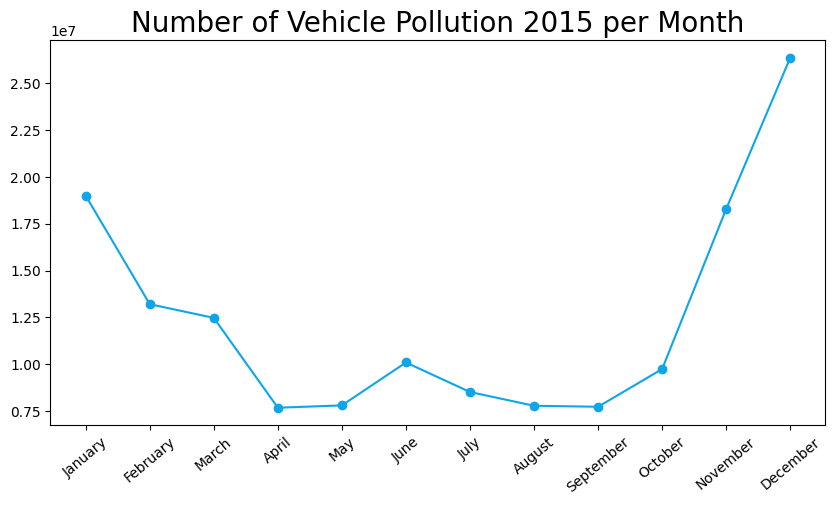

In [366]:
monthly_pollutions = new_df[new_df.datetime.dt.year == 2015]
monthly_pollutions = monthly_pollutions.resample(rule='M', on='datetime').agg({
    "vehicle_pollution": "sum"
})

monthly_pollutions.index = monthly_pollutions.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(monthly_pollutions.index, monthly_pollutions['vehicle_pollution'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Number of Vehicle Pollution 2015 per Month', loc='center', fontsize=20)
plt.show()

### Pertanyaan 2: polusi apa saja yang paling berpengaruh terhadap kualitas udara?

In [367]:
pollution_df = new_df.groupby(by=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']).agg({
    "PM2.5": "sum",
    "PM10": "sum",
    "SO2": "sum",
    "NO2": "sum",
    "CO": "sum",
    "O3": "sum",
})

pollution_df = pollution_df.mean().sort_values(ascending=True)

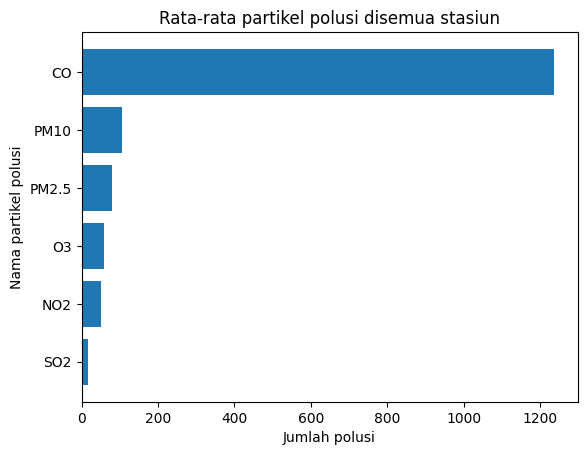

In [368]:
plt.barh(pollution_df.index, pollution_df.values)
plt.title(label="Rata-rata partikel polusi disemua stasiun")
plt.xlabel("Jumlah polusi")
plt.ylabel("Nama partikel polusi")
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
berdasarkan hasil analisis, tingkat polusi yang berasal dari kendaraan mulai meningkat tinggi pada bulan oktober dan puncak tertingginya berada pada bulan desember tahun 2015

- conclution pertanyaan 2 :
dari hasil bar plot diatas kita dapat dengan jelas melihat bahwa partikel CO (Karbon Monoksida) adalah yang paling banyak bertebaran diantara semua stasiun, kebanyakan partikel ini menurut data berasal dari industri / pabrik

In [371]:
new_df.to_csv('all_data.csv')